In [1]:
import wntr
import matplotlib.pyplot as plt

In [2]:
wn=wntr.network.WaterNetworkModel()

In [3]:
wn.add_junction('J1',base_demand=0.01, elevation=100.0,coordinates=(1,1))
wn.add_junction('J2',base_demand=0.01, elevation=120.0,coordinates=(2,2))
wn.add_junction('J3',base_demand=0.01, elevation=130.0,coordinates=(1.5,0))
wn.add_reservoir('R1',base_head=150,coordinates=(0,0))
wn.add_tank('T1',elevation=130,init_level=10,min_level=5,max_level=15,diameter=20,min_vol=100,coordinates=(2,0))
wn.add_pump('Pump1','J2','T1',pump_type='POWER',pump_parameter=100)
wn.add_pipe('P1','R1','J1',length=1000,diameter=0.3,roughness=100)
wn.add_pipe('P2','J1','J2',length=1000,diameter=0.3,roughness=100)
wn.add_pipe('P3','T1','J3',length=50,diameter=0.3,roughness=100)
wn.add_valve('V1','J3','J1',diameter=0.2,valve_type='PRV',initial_setting=100)

<Figure size 1000x1000 with 0 Axes>

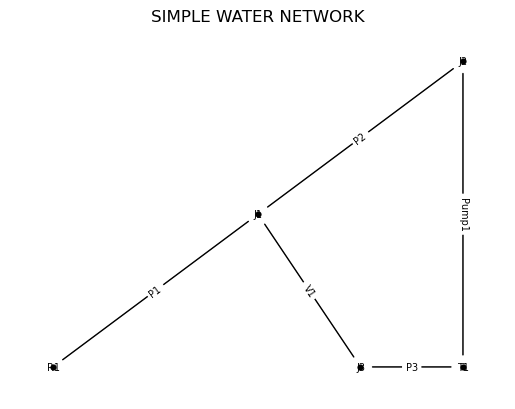

In [4]:
plt.figure(figsize=(10,10))
wntr.graphics.plot_network(wn,title="SIMPLE WATER NETWORK",node_labels=True,link_labels=True)
plt.show()

<Figure size 1000x800 with 0 Axes>

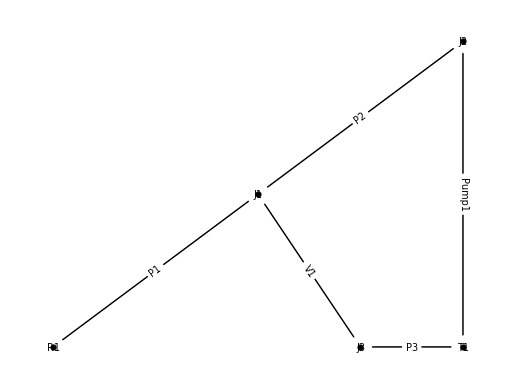

<Axes: >

In [5]:
plt.figure(figsize=(10,8))
wntr.graphics.plot_network(wn,node_labels=True,link_labels=True,node_colorbar_label='r',link_colorbar_label='b')

In [6]:
for node in wn.junctions():
    node=wn.get_node(node[0])
    print(node)

J1
J2
J3


In [7]:
node_j1=wn.get_node('J1')
node_j1.elevation=105
node_j1.demand_timeseries_list[0].base_value=0.02

In [8]:
node_j1

<Junction 'J1', elevation=105, demand_timeseries_list=<Demands: [<TimeSeries: base_value=0.02, pattern_name=None, category='None'>]>>

In [9]:
for link in wn.pipes():
    print(wn.get_link(link[0]))

P1
P2
P3


In [10]:
pipe_3=wn.get_link('P3')
pipe_3.diameter=0.35
pipe_3.length=100

In [11]:
pipe_3

<Pipe 'P3' from 'T1' to 'J3', length=100, diameter=0.35, roughness=100.0, minor_loss=0.0, check_valve=False, status=Open>

In [12]:
wn.options.time.duration=24*3600
wn.options.time.hydraulic_timestep=3600
wn.options.time.report_timestep=3600
sim=wntr.sim.WNTRSimulator(wn)
results=sim.run_sim()

/home/wahab901278/anaconda3/lib/python3.11/site-packages/wntr/sim/core.py:1294: UserWarning: Simulation did not converge at time 00:00:00. Reached maximum number of iterations: 2999
  warnings.warn('Simulation did not converge at time ' + self._get_time() + '. ' + mesg)


In [13]:
print(results.time)

[]


In [14]:
print("NODE PRESSURE DATA SUMMARY:-\n",
     results.node['pressure'].describe())

NODE PRESSURE DATA SUMMARY:-
         J1   J2   J3   T1   R1
count  0.0  0.0  0.0  0.0  0.0
mean   NaN  NaN  NaN  NaN  NaN
std    NaN  NaN  NaN  NaN  NaN
min    NaN  NaN  NaN  NaN  NaN
25%    NaN  NaN  NaN  NaN  NaN
50%    NaN  NaN  NaN  NaN  NaN
75%    NaN  NaN  NaN  NaN  NaN
max    NaN  NaN  NaN  NaN  NaN


In [15]:
node_pressures=results.node['pressure']

In [16]:
plt.figure(figsize=(10,8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [17]:
pressure=results.node['pressure']

JunctionJ4 not found in pressure data


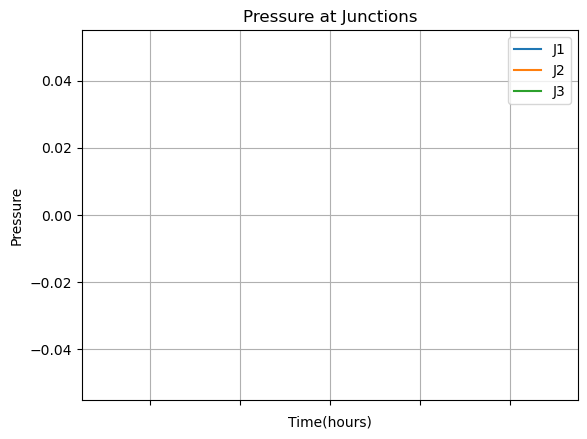

In [18]:
for junction in ['J1','J2','J3','J4']:
    if junction in pressure.columns:
        pressure[junction].plot(label=junction)
    else:
        print(f"Junction{junction} not found in pressure data")
plt.xlabel('Time(hours)')
plt.ylabel('Pressure')
plt.title('Pressure at Junctions')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
pressure.columns

Index(['J1', 'J2', 'J3', 'T1', 'R1'], dtype='object')

In [20]:
pressure

,J1,J2,J3,T1,R1


In [21]:
pressure_diff=pressure.diff()

In [22]:
pressure_diff

,J1,J2,J3,T1,R1


JunctionJ4 not found in pressure differential data


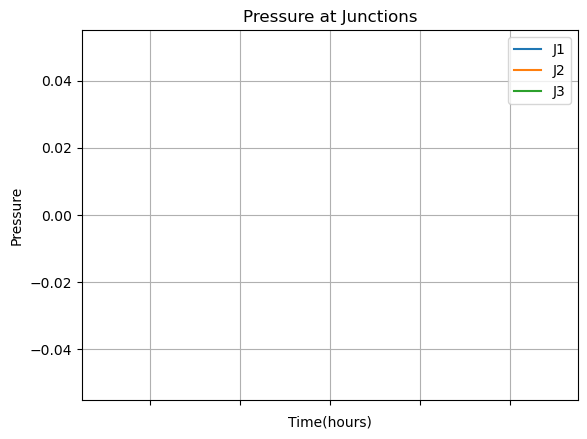

In [23]:
for junction in ['J1','J2','J3','J4']:
    if junction in pressure_diff.columns:
        pressure_diff[junction].plot(label=junction)
    else:
        print(f"Junction{junction} not found in pressure differential data")
plt.xlabel('Time(hours)')
plt.ylabel('Pressure')
plt.title('Pressure at Junctions')
plt.legend()
plt.grid(True)
plt.show()

/home/wahab901278/anaconda3/lib/python3.11/site-packages/wntr/sim/core.py:1294: UserWarning: Simulation did not converge at time 00:00:00. Reached maximum number of iterations: 2999
  warnings.warn('Simulation did not converge at time ' + self._get_time() + '. ' + mesg)


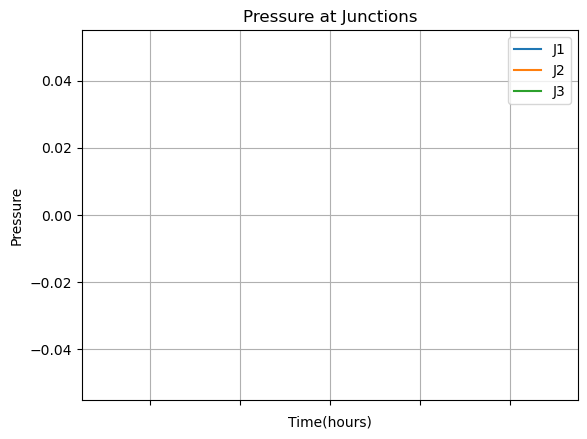

In [24]:
import wntr
import matplotlib.pyplot as plt
wn=wntr.network.WaterNetworkModel()
wn.add_junction('J1',base_demand=0.01, elevation=100.0,coordinates=(1,1))
wn.add_junction('J2',base_demand=0.01, elevation=120.0,coordinates=(2,2))
wn.add_junction('J3',base_demand=0.01, elevation=130.0,coordinates=(1.5,0))
wn.add_reservoir('R1',base_head=150,coordinates=(0,0))
wn.add_tank('T1',elevation=130,init_level=10,min_level=5,max_level=15,diameter=20,min_vol=100,coordinates=(2,0))
wn.add_pump('Pump1','J2','T1',pump_type='POWER',pump_parameter=100)
wn.add_pipe('P1','R1','J1',length=1000,diameter=0.3,roughness=100)
wn.add_pipe('P2','J1','J2',length=1000,diameter=0.3,roughness=100)
wn.add_pipe('P3','T1','J3',length=50,diameter=0.3,roughness=100)
wn.add_valve('V1','J3','J1',diameter=0.2,valve_type='PRV',initial_setting=100)

pipe_closing_time=6*3600
condition=wntr.network.controls.SimTimeCondition(wn,'=',pipe_closing_time)
action=wntr.network.controls.ControlAction(wn.get_link('P1'),'status',wntr.network.LinkStatus.CLOSED)
time_control=wntr.network.controls.Control(condition,action)
wn.add_control('close_pipe_P1',time_control)
wn.options.time.duration=24*3600
wn.options.time.hydraulic_timestep=3600
wn.options.time.report_timestep=3600
sim=wntr.sim.WNTRSimulator(wn)
results=sim.run_sim()
pressure=results.node['pressure']
for junction in ['J1','J2','J3']:
    if junction in pressure.columns:
        pressure[junction].plot(label=junction)
    else:
        print(f"Junction{junction} not found in pressure data")
plt.xlabel('Time(hours)')
plt.ylabel('Pressure')
plt.title('Pressure at Junctions')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
import wntr
import matplotlib.pyplot as plt
wn=wntr.network.WaterNetworkModel()
wn.add_junction('J1',base_demand=0.01, elevation=100.0,coordinates=(1,1))
wn.add_junction('J2',base_demand=0.01, elevation=120.0,coordinates=(2,2))
wn.add_junction('J3',base_demand=0.01, elevation=130.0,coordinates=(1.5,0))
wn.add_reservoir('R1',base_head=150,coordinates=(0,0))
wn.add_tank('T1',elevation=130,init_level=10,min_level=5,max_level=15,diameter=20,min_vol=100,coordinates=(2,0))
wn.add_pump('Pump1','J2','T1',pump_type='POWER',pump_parameter=100)
wn.add_pipe('P1','R1','J1',length=1000,diameter=0.3,roughness=100)
wn.add_pipe('P2','J1','J2',length=1000,diameter=0.3,roughness=100)
wn.add_pipe('P3','T1','J3',length=50,diameter=0.3,roughness=100)
wn.add_valve('V1','J3','J1',diameter=0.2,valve_type='PRV',initial_setting=100)

pattern=wntr.network.elements.Pattern('demand_pattern',[1,1.2,1.1,1.3,1.4,1.2,1,0.8,0.7,0.6,0.5,0.7,0.8,1.1,1,1.3,1.4,1.2,1.1,1,0,9,0.8,0.7])
wn.add_pattern('demand_pattern',pattern)

In [26]:
for junction in wn.junctions():
    junc=wn.get_node(junction[0])
    print(junc)
j1=wn.get_node('J1')
j2=wn.get_node('J2')
j1.demand_timeseries_list[0].pattern_name='demand_pattern'
j2.demand_timeseries_list[0].pattern_name='demand_pattern'

J1
J2
J3


In [27]:
leak_node=wn.get_node('J1')
leak_node.add_leak(wn,area=0.001,discharge_coeff=0.75,start_time=0)

In [28]:
wn.options.time.duration=24*3600
wn.options.time.hydraulic_timestep=3600
wn.options.time.report_timestep=3600
sim=wntr.sim.WNTRSimulator(wn)
results=sim.run_sim()

In [29]:
pressure=results.node['pressure']

In [30]:
pressure.describe()

,J1,J2,J3,T1,R1
count,25.000000,25.000000,25.000000,25.000000,25.0
mean,44.340580,22.138279,12.822841,12.868226,0.0
std,0.891646,1.971772,1.415934,1.460225,0.0
min,42.710677,15.192926,9.992655,10.000000,0.0
25%,43.695655,21.122866,11.686278,11.693622,0.0
50%,44.762667,22.879151,13.346494,13.353839,0.0
75%,44.944180,23.441438,13.973764,14.019990,0.0
max,46.003351,24.347245,14.615474,14.932109,0.0


JunctionJ4 not found in pressure data


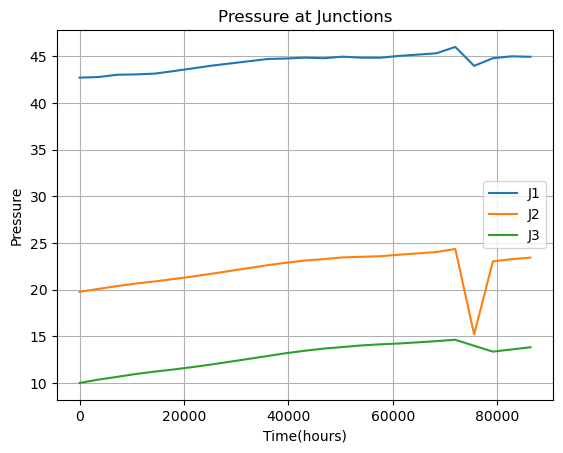

In [31]:
for junction in ['J1','J2','J3','J4']:
    if junction in pressure.columns:
        pressure[junction].plot(label=junction)
    else:
        print(f"Junction{junction} not found in pressure data")
plt.xlabel('Time(hours)')
plt.ylabel('Pressure')
plt.title('Pressure at Junctions')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
help(wn.add_pump)

Help on method add_pump in module wntr.network.model:

add_pump(name, start_node_name, end_node_name, pump_type='POWER', pump_parameter=50.0, speed=1.0, pattern=None, initial_status='OPEN') method of wntr.network.model.WaterNetworkModel instance
    Adds a pump to the water network model
    
    Parameters
    ----------
    name : string
        Name of the pump.
    start_node_name : string
         Name of the start node.
    end_node_name : string
         Name of the end node.
    pump_type : string, optional
        Type of information provided for a pump. Options are 'POWER' or 'HEAD'.
    pump_parameter : float or string
        For a POWER pump, the pump power.
        For a HEAD pump, the head curve name.
    speed: float
        Relative speed setting (1.0 is normal speed)
    pattern: string
        Name of the speed pattern
    initial_status : string or LinkStatus
        Pump initial status. Options are 'OPEN' or 'CLOSED'.

